# Data analysis and preperation
In this python notebook I will be looking into the following dataset: https://www.kaggle.com/datasets/agrigorev/clothing-dataset-full </br>
I will analyse the data and prepare it so that it can be used to train the model.

First I start off by important all of the needed librarys

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

I then define the data and image size and check how many images there are.

In [2]:
IMAGE_SIZE = 224

In [3]:
len(os.listdir('DeepFashion2'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'DeepFashion2'

I then read the csv files that labels all of the different images.

In [10]:
labels = pd.read_csv('images.csv')
labels.head()

FileNotFoundError: [Errno 2] No such file or directory: 'images.csv'

In [11]:
labels.shape

NameError: name 'labels' is not defined

For each label I check the amount of images to see if there is enough data for each of the types of clothing. </br> As you can see there is a lot more data for t-shirts compared to blouse, this is something I will need to take into account when searching for more data later on.

In [12]:
labels.label.value_counts()

NameError: name 'labels' is not defined

I then remove the images labeled as skip since they are not working/corrupted. I also make sure all of the images are .jpg images to make using them easier.

In [13]:
# Remove images with 'Skip' as they are corrupted
labels = labels[labels['label'] != 'Skip']

# Add '.jpg' extension
labels['image'] = labels['image'] + '.jpg'

NameError: name 'labels' is not defined

Here I check to see which types of labels there are in the csv file

In [17]:
labels_lst = labels.label.unique().tolist()
labels_lst

['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Blazer']

After having done the first part of the data preperation I check again how many images of each label are found and see that the skipped images are not there anymore. </br> Which is exactly what I wanted to happen.

In [18]:
labels.label.value_counts()

label
T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Name: count, dtype: int64

Now that the first data has been prepared and cleaned it is time to see how it does when used to train a model.

# changing dataset
After finding out that the data is not labeled I chose to change a dataset that has labeled data in order to save time. </br>
The new dataset that I will be using is the colorful fashion dataset, this dataset is already annotated making it easier to train a model on. </br>
Firs I download the dataset from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyngiabol/colorful-fashion-dataset-for-object-detection")

print("Path to dataset files:", path)

c:\Users\Joep\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Joep\.cache\kagglehub\datasets\nguyngiabol\colorful-fashion-dataset-for-object-detection\versions\1


I then define the path to all of the images and annotations

In [3]:
images_path = 'C:/Users/Joep/.cache/kagglehub/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection/versions/1/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = 'C:/Users/Joep/.cache/kagglehub/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection/versions/1/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = 'C:/Users/Joep/.cache/kagglehub/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection/versions/1/colorful_fashion_dataset_for_object_detection/'

I then import all of the libraries and make sure the define the detection model which will be yolov11

In [4]:
%matplotlib inline
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
# load pre-trained model
detection_model = YOLO("yolo11n.pt")

I make sure to be using my gpu instead of my cpu in order to save a lot of time training.

In [5]:
# Check GPU is working or not
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.5.1+cu118 (NVIDIA GeForce GTX 1080)


I then choose a random image to test the pre trained layers of yolo on to see if it is correctly working.

WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

Found https://i.stack.imgur.com/GRdCC.jpg locally at GRdCC.jpg
image 1/1 c:\Users\Joep\sem7\data challenge\GRdCC.jpg: 448x640 2 persons, 5 cars, 49.7ms
Speed: 9.6ms preprocess, 49.7ms inference, 152.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4


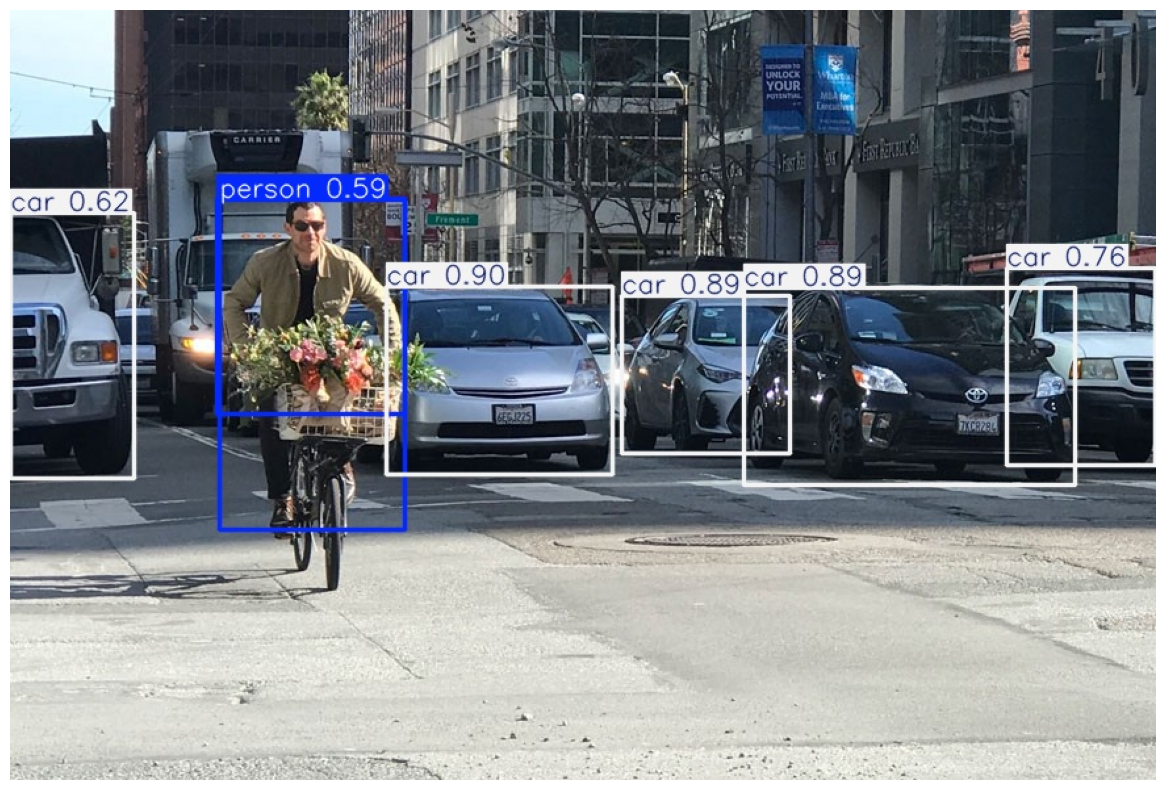

In [6]:
# choose random image
img = random.choice(os.listdir(images_path))

i=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_thickness=2, show_labels=True)

im = plt.imread('runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

I then open the train and test labels, and then I copy all of the images in the correct folders.

In [7]:
train = []
with open('C:/Users/Joep/.cache/kagglehub/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection/versions/1/colorful_fashion_dataset_for_object_detection/ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open('C:/Users/Joep/.cache/kagglehub/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection/versions/1/colorful_fashion_dataset_for_object_detection/ImageSets/main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [8]:
train_path = 'yoloData/train/'
test_path = 'yoloData/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:21<00:00, 99.86it/s] 


Copying Test Data..!!


100%|██████████| 537/537 [00:05<00:00, 96.61it/s] 


In [9]:
text = """
train: C:/Users/Joep/sem7/data challenge/yoloData/train
val: C:/Users/Joep/sem7/data challenge/yoloData/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

I then start training the model using the newely defined data.

In [10]:
detection_model.train(data='data.yaml', epochs=5)

New https://pypi.org/project/ultralytics/8.3.58 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.39  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

train: Scanning C:\Users\Joep\sem7\data challenge\yoloData\train\labels.cache... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:00<?, ?it/s]
val: Scanning C:\Users\Joep\sem7\data challenge\yoloData\test\labels.cache... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<?, ?it/s]


Plotting labels to runs\detect\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train16
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.66G      2.222       3.87      2.083         13        640: 100%|██████████| 135/135 [00:49<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]

                   all        537       2035      0.673      0.226      0.186     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.69G      1.647      2.413       1.58         13        640: 100%|██████████| 135/135 [00:43<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        537       2035      0.562      0.494      0.483       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.63G      1.478      1.918      1.461          2        640: 100%|██████████| 135/135 [00:41<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.69it/s]

                   all        537       2035      0.536      0.621      0.588      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.69G      1.406       1.71      1.397          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]

                   all        537       2035      0.657       0.64      0.662      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.63G      1.371      1.625      1.376          4        640: 100%|██████████| 135/135 [00:41<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.75it/s]

                   all        537       2035      0.661      0.634      0.671      0.424



5 epochs completed in 0.071 hours.
Optimizer stripped from runs\detect\train16\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train16\weights\best.pt, 5.5MB

Validating runs\detect\train16\weights\best.pt...
Ultralytics 8.3.39  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]


                   all        537       2035      0.661      0.634      0.672      0.423
              sunglass         82         82      0.391      0.122      0.188     0.0589
                   hat         77         77      0.714      0.571      0.664      0.335
                jacket        179        181      0.642      0.773       0.79      0.578
                 shirt        361        366      0.734      0.694      0.734      0.469
                 pants        114        114      0.833      0.918      0.938      0.704
                shorts        107        107      0.581      0.692      0.668      0.415
                 skirt        186        186      0.568      0.699       0.63      0.468
                 dress        128        128      0.603      0.633      0.698      0.492
                   bag        274        274      0.787      0.518      0.641      0.318
                  shoe        520        520      0.758      0.723       0.77      0.398
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001910719DB20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,   

After training I visualise all of the results to see if the model is training correctly and to see if it is accurate. </br> 
Doing this I can also see if it is overfitting or not.

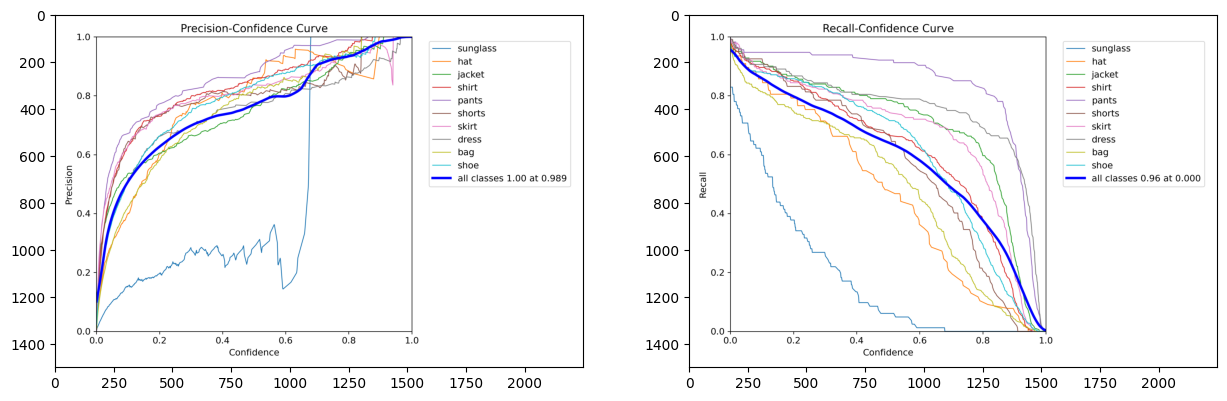

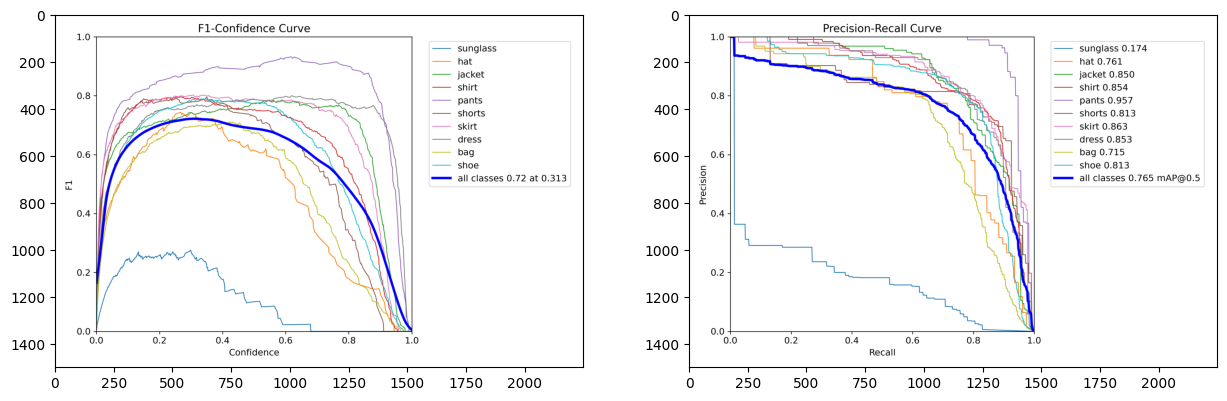

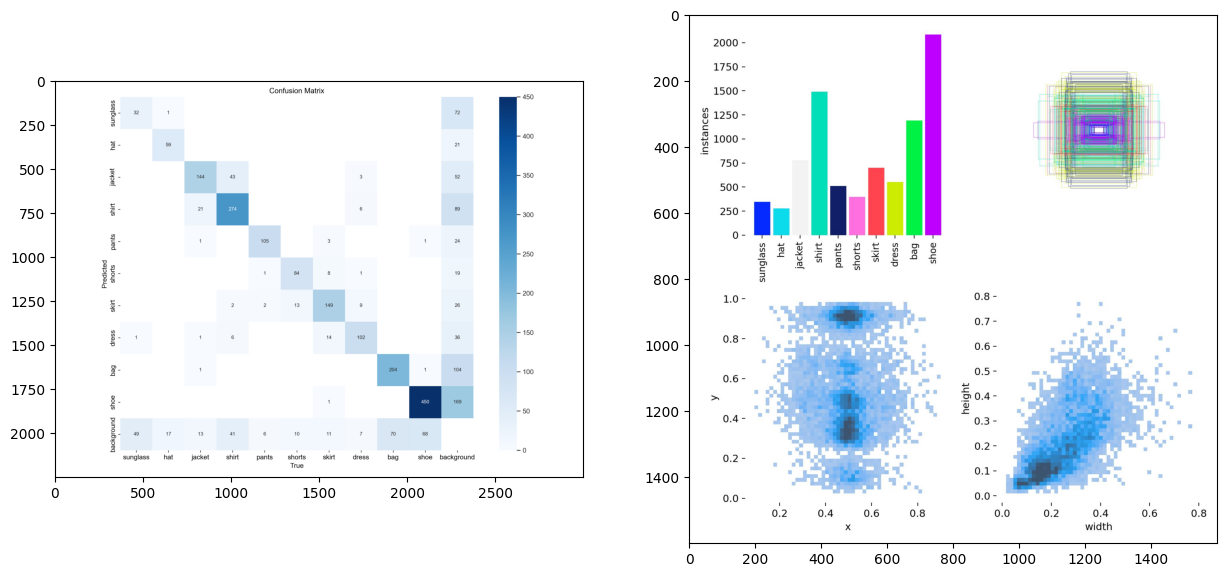

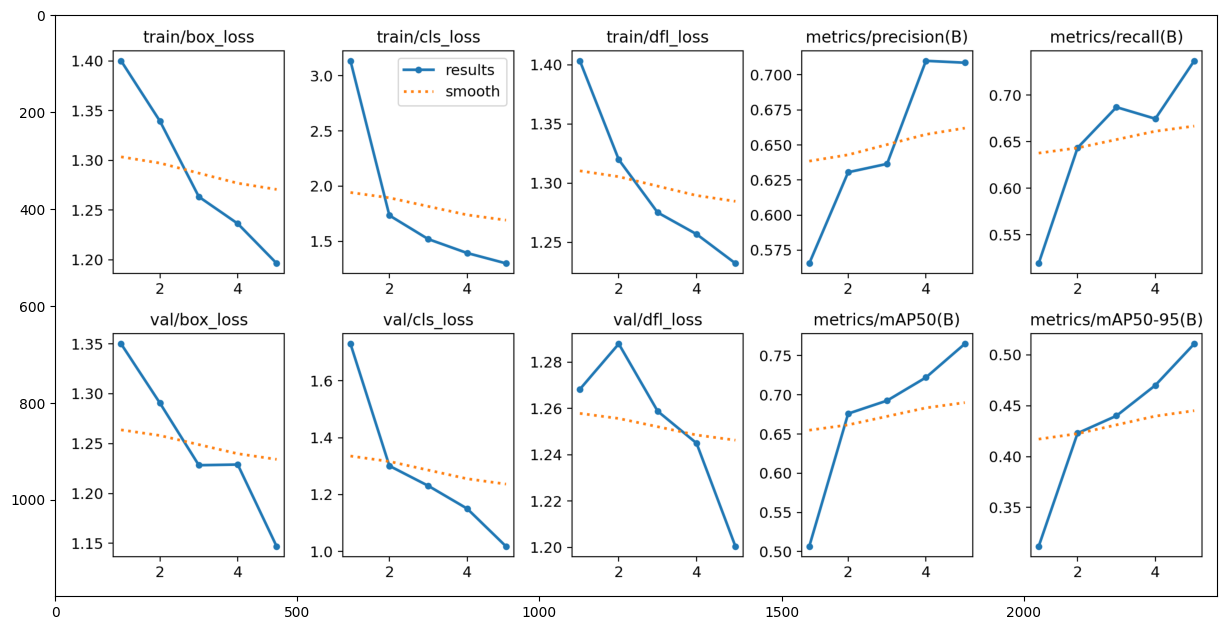

In [ ]:
%matplotlib inline
model_path = 'runs/detect/train9/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

To see how the model would do on different types of clothing images I will test the model out on some new data.</br>
Doing this I can see that there is still space for improvement since the model is not seeing all of the clothing pieces</br>
I still think the model can improve using more epochs to train, but afterwards we will need more data to improve it.

WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\Joep\sem7\data challenge\test-images\test5.jpg: 384x640 (no detections), 259.0ms
Speed: 5.0ms preprocess, 259.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\Joep\sem7\data challenge\test-images\test4.jpg: 448x640 1 dress, 191.9ms
Speed: 3.0ms preprocess, 191.9ms inference, 23.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\Joep\sem7\data challenge\test-images\test3.jpg: 448x640 1 bag, 72.0ms
Speed: 3.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image

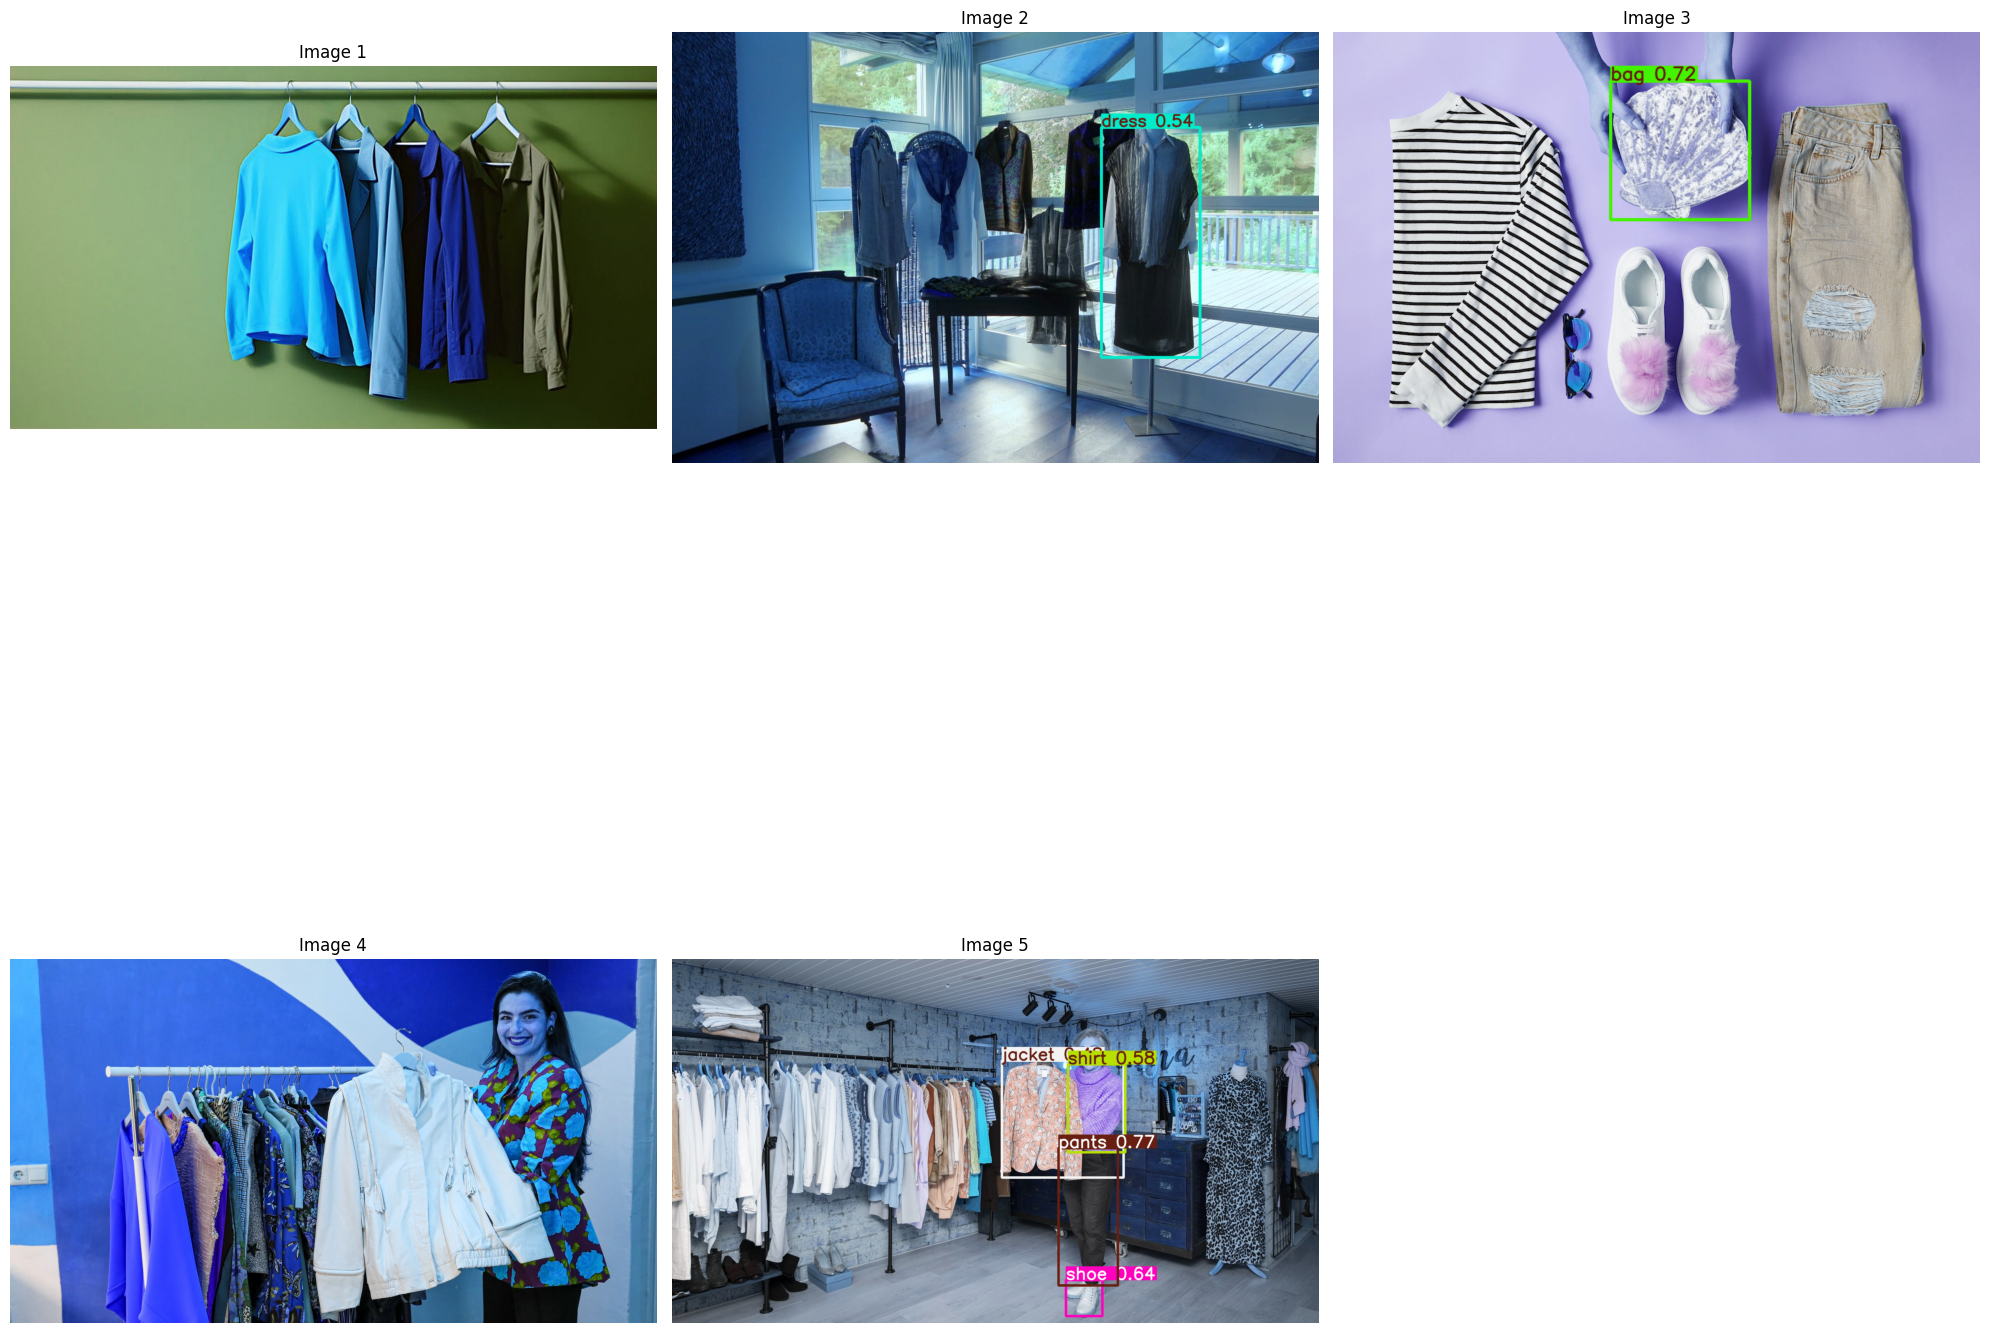

In [14]:
plt.figure(figsize=(20, 20))
first_Detection = YOLO("runs/detect/train9/weights/best.pt")
# Randomly select 6 images
imgs = random.sample(os.listdir("test-images/"), 5)

# Counter for subplots
c = 1

for img in imgs:
    # Full path to the image
    img_path = os.path.join("test-images/", img)
    
    # Perform prediction
    results = first_Detection.predict(source=img_path, conf=0.4, save=False, line_thickness=2)  # save=False avoids saving
    
    # Extract the plotted image directly from the results
    for result in results:
        # Convert the result into an image (NumPy array)
        im_array = result.plot()  # 'plot()' returns an image array with the detections drawn

        # Plot the image in the grid
        plt.subplot(2, 3, c)
        plt.axis('off')
        plt.imshow(im_array)  # Display the modified image
        plt.title(f"Image {c}")
        c += 1

plt.tight_layout()
plt.show()

To see if it will improve the results I will retrain it using 50 epochs instead of the initial 5.

In [42]:
detection_model.train(data='data.yaml', epochs=50)

New https://pypi.org/project/ultralytics/8.3.49 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.39  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning C:\Users\Joep\sem7\data challenge\yoloData\train\labels.cache... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:00<?, ?it/s]
val: Scanning C:\Users\Joep\sem7\data challenge\yoloData\test\labels.cache... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.75G        1.4      3.135      1.403         13        640: 100%|██████████| 135/135 [00:49<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]

                   all        537       2035      0.566      0.519      0.507      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.8G      1.352      1.744      1.327         13        640: 100%|██████████| 135/135 [00:42<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]

                   all        537       2035      0.571      0.692      0.646      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.72G      1.301      1.577      1.293          2        640: 100%|██████████| 135/135 [00:42<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]

                   all        537       2035       0.65      0.652      0.671      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.79G      1.293      1.448      1.289          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.63it/s]

                   all        537       2035      0.636      0.699      0.707      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.72G       1.28      1.389      1.282          4        640: 100%|██████████| 135/135 [00:41<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.68it/s]

                   all        537       2035      0.643      0.691      0.712      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.79G      1.254      1.315      1.263          1        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.78it/s]

                   all        537       2035      0.685      0.714      0.738      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.76G      1.221      1.246      1.256          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]

                   all        537       2035       0.71      0.691      0.735      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.79G      1.204        1.2      1.244         10        640: 100%|██████████| 135/135 [00:40<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        537       2035      0.695      0.726      0.755      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.72G      1.194      1.165      1.235         11        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.59it/s]

                   all        537       2035      0.663      0.741      0.734      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.79G      1.186      1.127      1.232          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035      0.701       0.74      0.766      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.8G      1.179      1.106      1.226          9        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        537       2035      0.687      0.749      0.758      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.8G      1.172      1.062      1.219          8        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]

                   all        537       2035      0.777      0.699       0.77       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.75G      1.156      1.055      1.211          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.87it/s]

                   all        537       2035      0.719       0.73      0.755      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.71G      1.145      1.037      1.209         14        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035      0.723      0.747      0.766      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.79G      1.141          1      1.203         10        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035      0.742      0.736      0.771      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.75G      1.131     0.9922      1.195          6        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        537       2035       0.72      0.746      0.759      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G      1.138      0.981      1.199          6        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.88it/s]

                   all        537       2035      0.706      0.768      0.776      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.75G      1.115     0.9604      1.186         13        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        537       2035      0.714      0.744      0.767      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.8G      1.112     0.9483      1.186          6        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035       0.73      0.767      0.789       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.76G      1.112     0.9352       1.19         12        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035      0.745      0.745      0.772      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.76G      1.111     0.9131      1.185         17        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]

                   all        537       2035      0.751      0.747      0.784      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.78G      1.104     0.9086      1.181          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.79it/s]

                   all        537       2035      0.765      0.759      0.789      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.76G      1.084     0.8904      1.162         14        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.87it/s]

                   all        537       2035      0.737      0.761      0.784      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.77G      1.082     0.8793      1.169         14        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.72it/s]

                   all        537       2035      0.789      0.745      0.778      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.79G      1.063     0.8638      1.158         12        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035      0.748      0.759      0.781      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.78G      1.074     0.8524      1.158         11        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035      0.752      0.755      0.784      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.78G       1.07     0.8521       1.16         11        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.89it/s]

                   all        537       2035      0.723      0.771      0.783      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.8G       1.05     0.8319      1.151         14        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.86it/s]

                   all        537       2035      0.729      0.776      0.786       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.72G      1.047     0.8254      1.149          6        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        537       2035      0.741      0.762      0.779      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.75G      1.038     0.8068      1.139         17        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.87it/s]

                   all        537       2035      0.755      0.758      0.787      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.72G      1.032     0.8139      1.142         11        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035      0.759      0.762      0.783      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.78G      1.028     0.7986      1.134         11        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035        0.8      0.742      0.796      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.75G      1.023     0.7798      1.129         10        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        537       2035      0.741      0.768      0.793      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.78G      1.008     0.7825      1.125          7        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.89it/s]

                   all        537       2035      0.765      0.756      0.791      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.79G      1.012     0.7824      1.127          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035       0.75       0.76      0.791      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.76G      1.004     0.7522      1.123         12        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.78it/s]

                   all        537       2035      0.762      0.744      0.784      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.73G      1.002     0.7489      1.125         16        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        537       2035      0.769      0.772       0.79      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.76G     0.9918     0.7429      1.117          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.87it/s]

                   all        537       2035      0.757      0.773      0.793      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.75G     0.9873     0.7363      1.113         10        640: 100%|██████████| 135/135 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        537       2035      0.749      0.768      0.794      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.78G     0.9726     0.7258       1.11          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        537       2035      0.748      0.787      0.802      0.538


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.76G     0.9273     0.6314      1.085          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.86it/s]

                   all        537       2035      0.732       0.77      0.779      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.75G     0.9041     0.5995      1.072          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035      0.756      0.775      0.789       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.76G     0.8989     0.5934      1.068          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.89it/s]

                   all        537       2035      0.777      0.749      0.781      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.76G     0.8882     0.5799      1.066          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        537       2035       0.73      0.775      0.777       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.76G     0.8875     0.5758      1.063          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        537       2035      0.754       0.77      0.789      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.75G     0.8742     0.5683      1.057          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]

                   all        537       2035      0.758       0.77      0.786      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.76G     0.8676     0.5542      1.047          4        640: 100%|██████████| 135/135 [00:40<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.73it/s]

                   all        537       2035      0.756      0.777      0.786      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.76G     0.8596     0.5528      1.049          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035      0.768      0.769      0.785      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.76G     0.8632     0.5495      1.051          3        640: 100%|██████████| 135/135 [00:40<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.87it/s]

                   all        537       2035       0.77      0.766      0.789      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.75G     0.8555     0.5379      1.046          2        640: 100%|██████████| 135/135 [00:40<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.83it/s]

                   all        537       2035      0.769      0.769      0.789      0.533



50 epochs completed in 0.662 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 5.5MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics 8.3.39  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]


                   all        537       2035      0.749       0.77      0.794      0.541
              sunglass         82         82      0.571      0.256      0.342      0.127
                   hat         77         77      0.769      0.823      0.854      0.526
                jacket        179        181      0.806      0.807       0.86       0.68
                 shirt        361        366      0.797      0.849      0.856      0.614
                 pants        114        114      0.858      0.901       0.94      0.741
                shorts        107        107      0.797       0.77      0.802      0.513
                 skirt        186        186      0.752      0.849      0.875      0.684
                 dress        128        128      0.693      0.863      0.831      0.658
                   bag        274        274        0.7      0.765      0.774      0.407
                  shoe        520        520      0.747      0.813      0.809      0.461
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C328398C20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,   

As we can see from the results the model has gotten worse at detecting then before, meaning it is probably overfitting. </br>
Usually overfitting does not happen at such low epoch count which mean we will probably need a way bigger dataset to get this to be more accurate. </br>
In the next step I will be adding more data onto this dataset to increase the accuracy of the model

WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\Joep\sem7\data challenge\test-images\test3.jpg: 448x640 1 skirt, 1 bag, 85.8ms
Speed: 3.0ms preprocess, 85.8ms inference, 101.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\Joep\sem7\data challenge\test-images\test5.jpg: 384x640 (no detections), 100.6ms
Speed: 1.0ms preprocess, 100.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\Joep\sem7\data challenge\test-images\images.jpg: 576x640 1 dress, 50.2ms
Speed: 3.0ms preprocess, 50.2ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 640)
WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instea

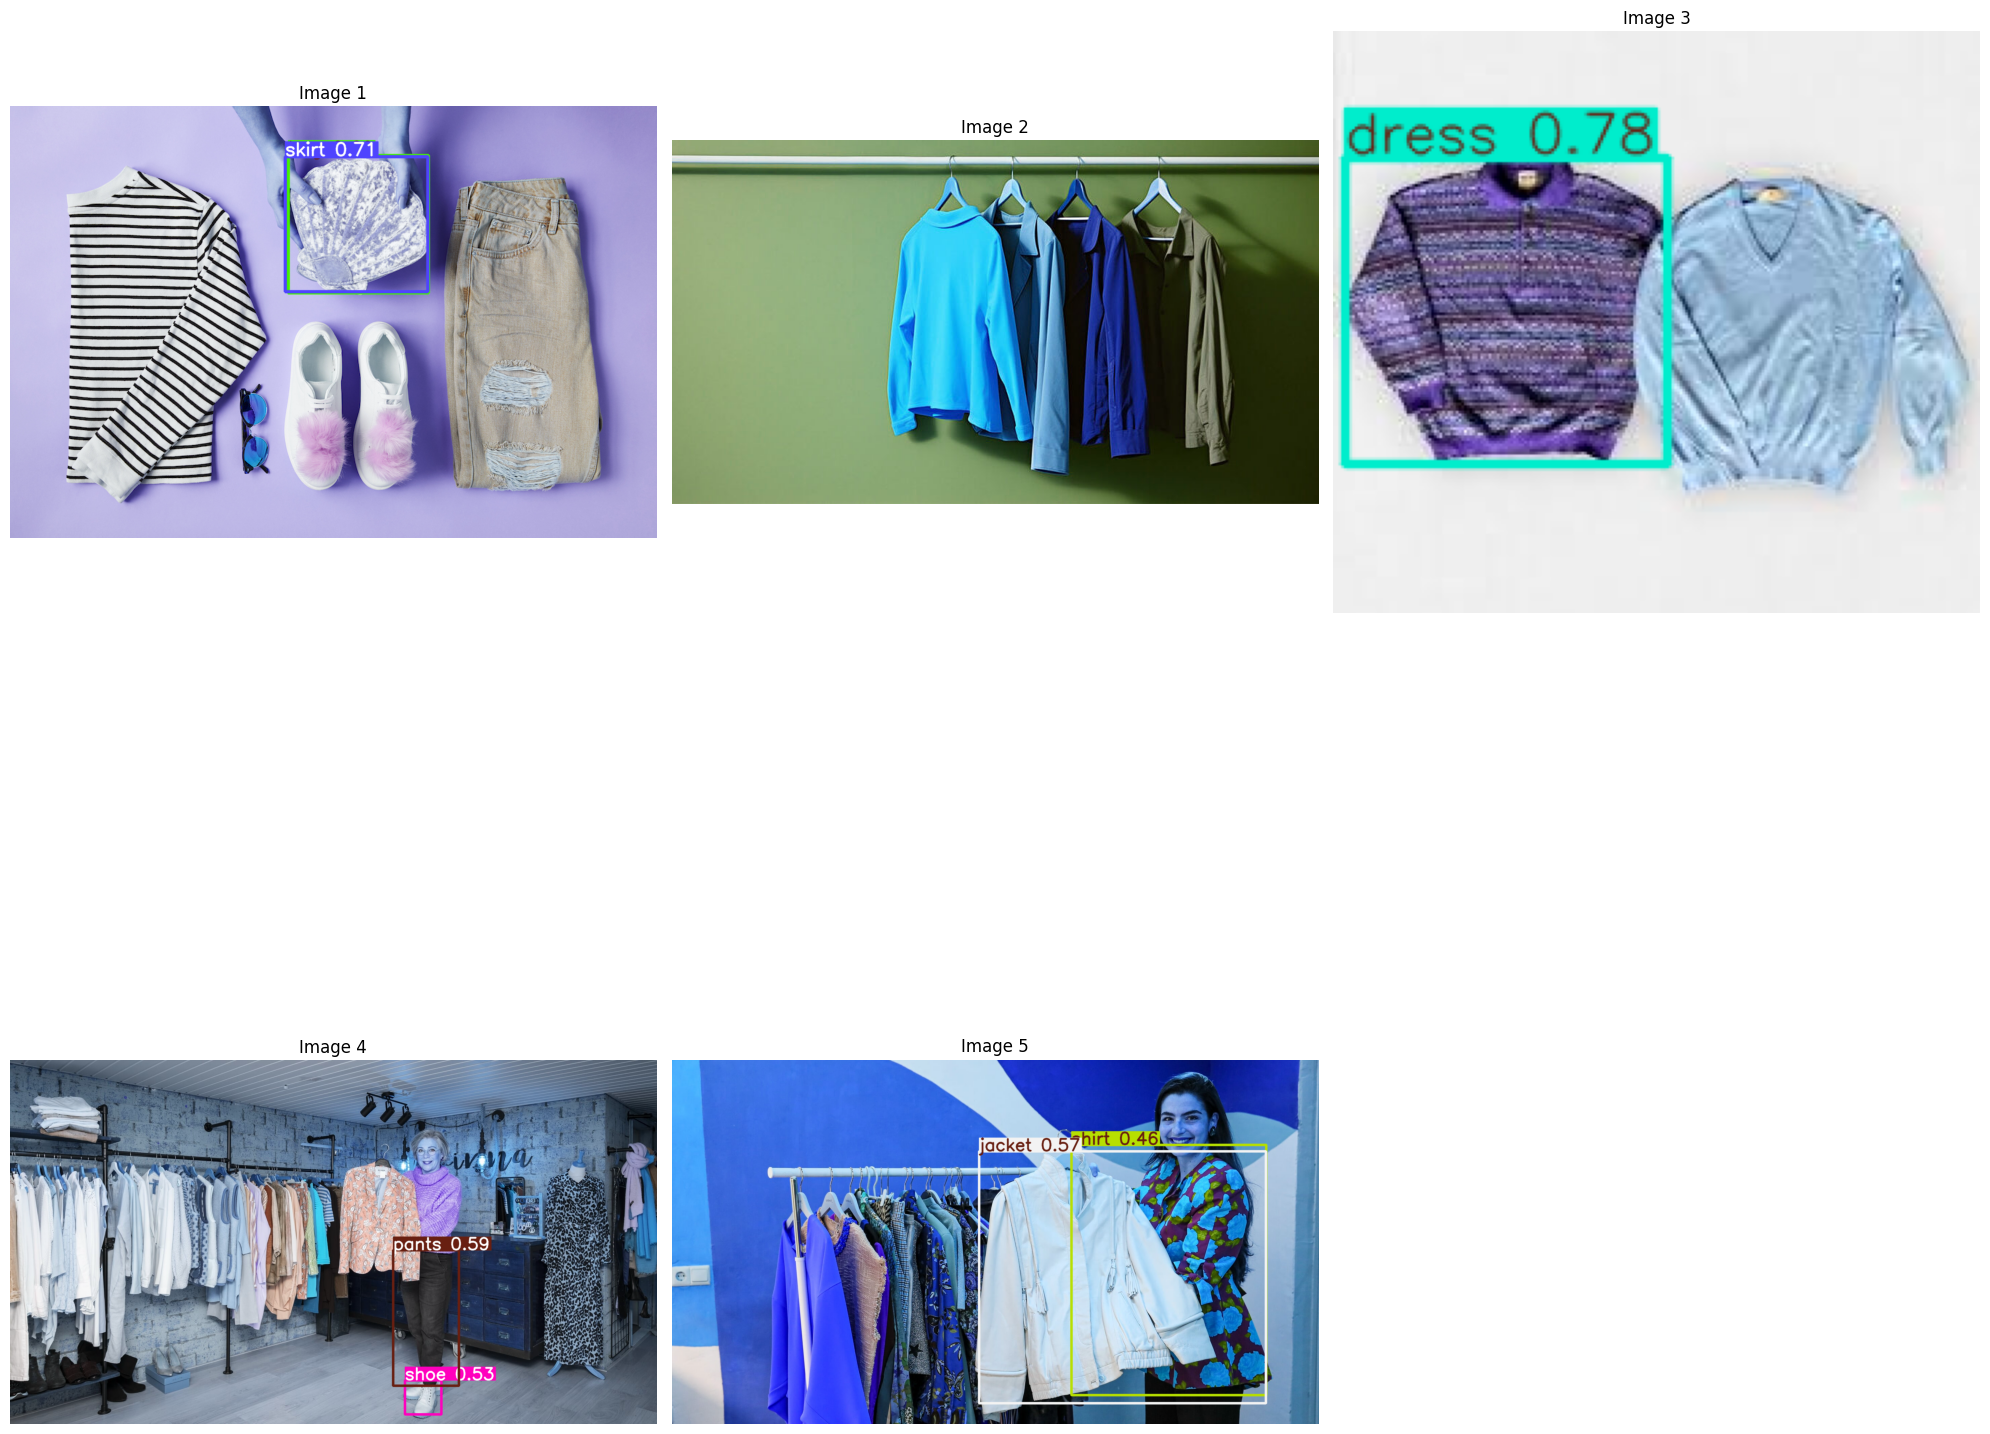

In [11]:
plt.figure(figsize=(20, 20))

# Randomly select 6 images
imgs = random.sample(os.listdir("test-images/"), 5)
newModel = YOLO("runs/detect/train10/weights/best.pt")
# Counter for subplots
c = 1

for img in imgs:
    # Full path to the image
    img_path = os.path.join("test-images/", img)
    
    # Perform prediction
    results = newModel.predict(source=img_path, conf=0.4, save=False, line_thickness=2)  # save=False avoids saving
    
    # Extract the plotted image directly from the results
    for result in results:
        # Convert the result into an image (NumPy array)
        im_array = result.plot()  # 'plot()' returns an image array with the detections drawn

        # Plot the image in the grid
        plt.subplot(2, 3, c)
        plt.axis('off')
        plt.imshow(im_array)  # Display the modified image
        plt.title(f"Image {c}")
        c += 1

plt.tight_layout()
plt.show()